# Recogida de datos

## Lectura del CSV

In [601]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [602]:
import pandas as pd


df = pd.read_csv(path+"creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Tratamiento del DataSet

33.333333333333336 %
66.66666666666667 %


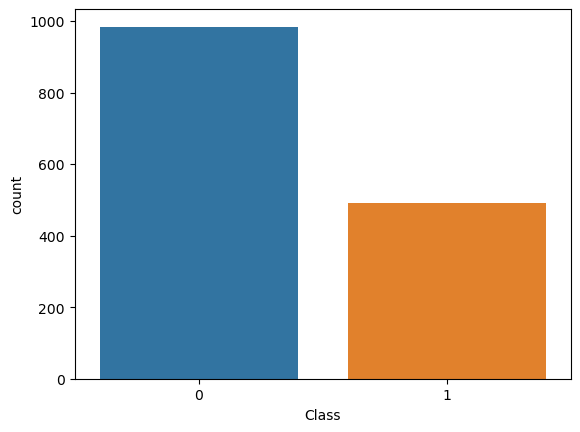

In [603]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

fraude = df[df['Class'] == 1]
no_fraude = df[df['Class'] == 0].sample(int(len(fraude)*2),random_state=42)


df=pd.concat([fraude,no_fraude])
fig,ax=plt.subplots()
sns.countplot(data=df,x='Class')

print(len(fraude)*100/len(df),"%")
print(len(no_fraude)*100/len(df),"%")

# Análisis del DataSet

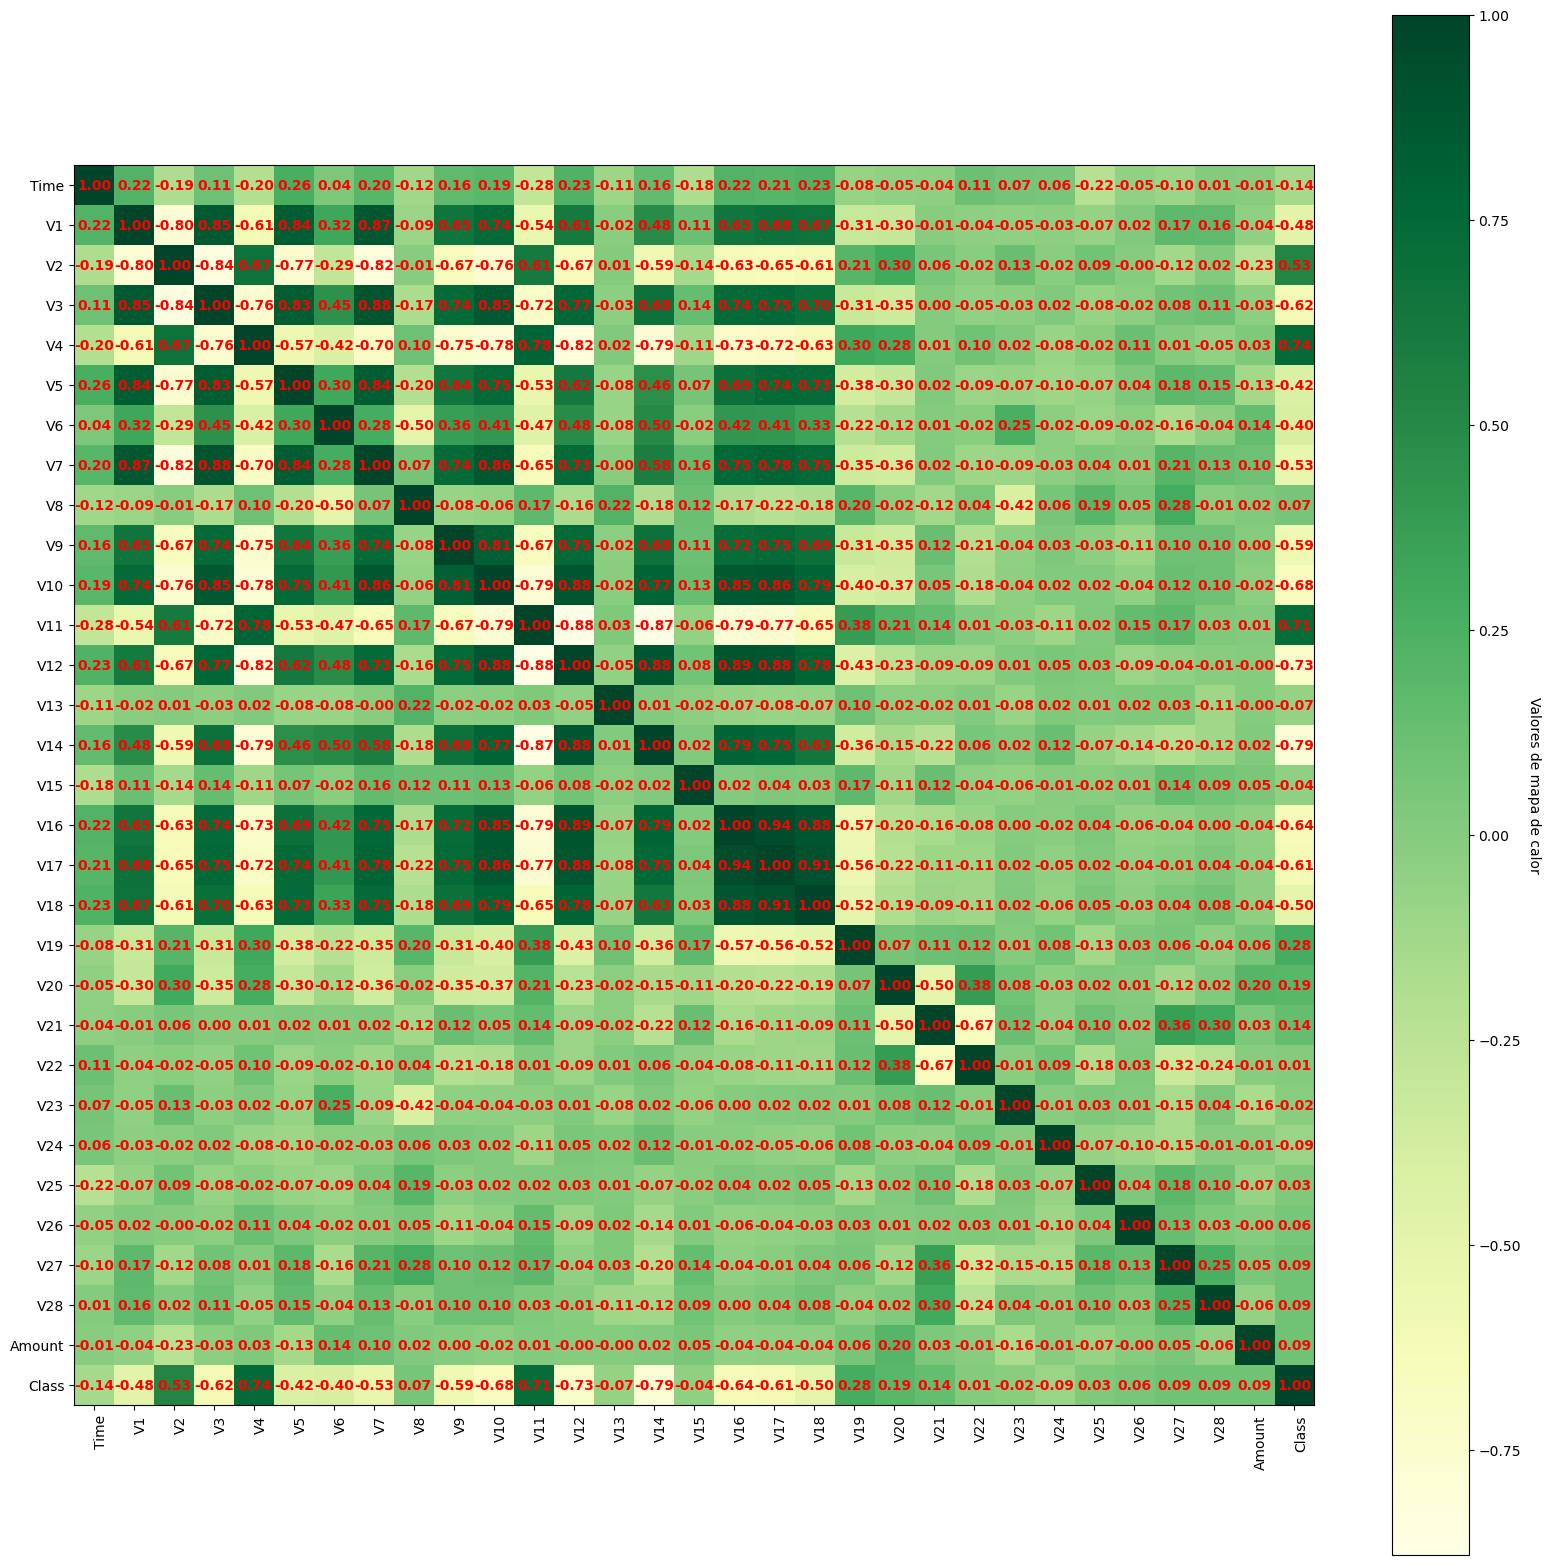

In [604]:
from Clases.Matplot.HeatMap import HeatMap


corr_matrix = df.corr()
HeatMap.heat_map(corr_matrix,corr_matrix.columns,corr_matrix,corr_matrix.columns,corr_matrix.columns,cmap="YlGn",figsize=(20,20),weight="bold",textColor="red")

## Borrar columnas con poca correlación

In [605]:
df=df[corr_matrix[(corr_matrix['Class']>=0.09) | (corr_matrix['Class']<=-0.09)].index]

# Análisis de los Datos X e Y

In [606]:
df=df.sample(frac=1,random_state=42)

In [607]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [608]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V14,V16,V17,V18,V19,V20,V21,V27,V28,Amount
268412,163194.0,-1.187946,0.939033,-0.549578,-1.255884,0.619614,-1.343099,0.690384,-2.518414,0.197024,...,0.459041,-0.390091,1.154899,-1.659260,1.835701,-0.050599,1.299272,-0.208807,-0.062048,10.00
76555,56624.0,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,-4.542447,-7.748480,...,-8.107975,-6.288306,-13.753131,-4.329239,1.504250,-0.614719,0.077739,0.423620,-0.105169,153.46
237029,149063.0,2.152503,-0.561919,-2.532138,-0.571962,0.315469,-1.126024,0.423526,-1.298174,1.214584,...,1.063403,-2.031689,-0.014592,1.233866,-0.384477,-0.589789,-0.045175,-0.143041,-0.090588,44.00
15539,26931.0,-22.561699,13.208904,-24.643819,6.232532,-16.905611,-4.497439,-16.810184,-3.871297,-8.581266,...,-7.577552,-6.454783,-12.845657,-4.865918,1.062442,1.621444,1.765987,1.504425,0.445920,99.99
96789,65936.0,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.014963,-2.856117,...,-6.160457,-2.543105,-5.301273,-2.192713,-0.094724,-0.478219,0.351792,-1.478767,0.722673,101.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258223,158550.0,0.063699,0.146512,0.843741,-0.532952,-0.006310,-0.219382,0.293402,0.715520,-0.857106,...,-0.090549,0.358771,-0.686359,0.050479,-0.348673,-0.068855,-0.129309,-0.040553,-0.065335,54.99
94116,64741.0,1.237285,0.695662,-0.353485,1.355507,0.047586,-1.254264,0.284145,-0.028516,-0.669460,...,-1.254125,0.615591,0.918108,0.643007,-0.622807,-0.124456,-0.072452,0.032552,0.056618,1.00
271842,164776.0,1.947737,0.009899,-1.244776,1.302383,0.040133,-1.067379,0.301814,0.330881,0.328189,...,0.643363,-0.061264,-0.526809,-0.009001,-0.695012,-0.237873,0.279370,-0.005599,-0.046730,42.80
162821,115398.0,1.875396,0.863385,-3.096660,3.046752,3.452336,3.714368,-0.173752,-1.237777,0.322113,...,-2.292316,1.595618,1.332825,0.276623,-1.869254,-0.128265,-0.423135,0.014051,0.012553,12.97


# Manejo de datos con PCA

In [609]:
import time
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler


t0 = time.time()

scaler = StandardScaler()
X_orig = scaler.fit_transform(X)
X_reduced_pca = PCA(n_components=0.95).fit_transform(X_orig)
t1 = time.time()
print("PCA le llevó {:.2} s".format(t1 - t0))

PCA le llevó 0.016 s


## Plots de los datos

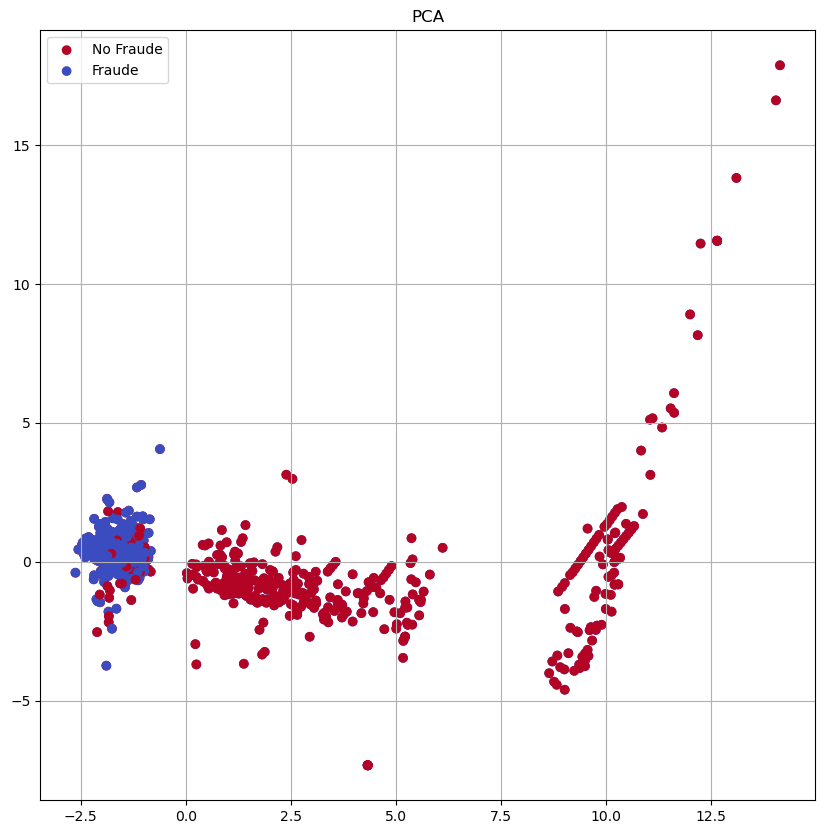

In [610]:
fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==0),label="No Fraude",linewidth=1,cmap="coolwarm")
ax.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==1),label="Fraude",linewidth=1,cmap="coolwarm")
ax.set_title("PCA")
ax.grid(True)

ax.legend()

## KMeans

In [634]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5,random_state=42,init="k-means++")
data = kmeans.fit(X_reduced_pca[:,:2])
data

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

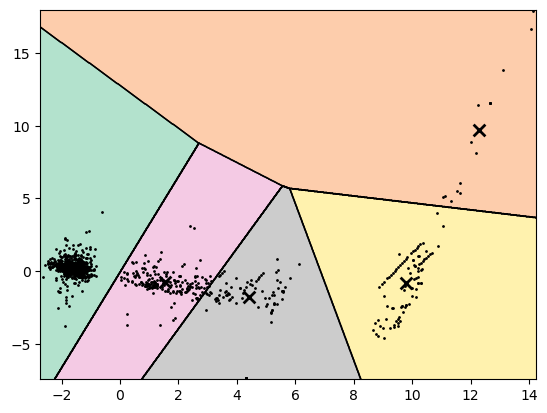

In [635]:
import numpy as np


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids,  circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution=1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),   np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)


plot_decision_boundaries(kmeans,X_reduced_pca[:,:2])

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-p

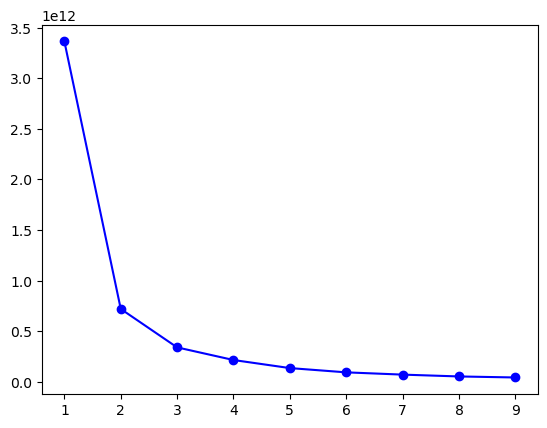

In [636]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")

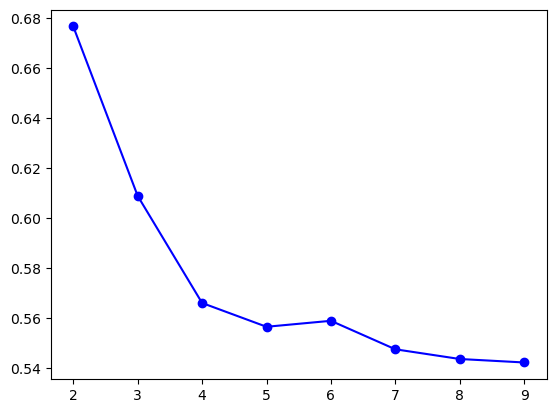

In [637]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-")

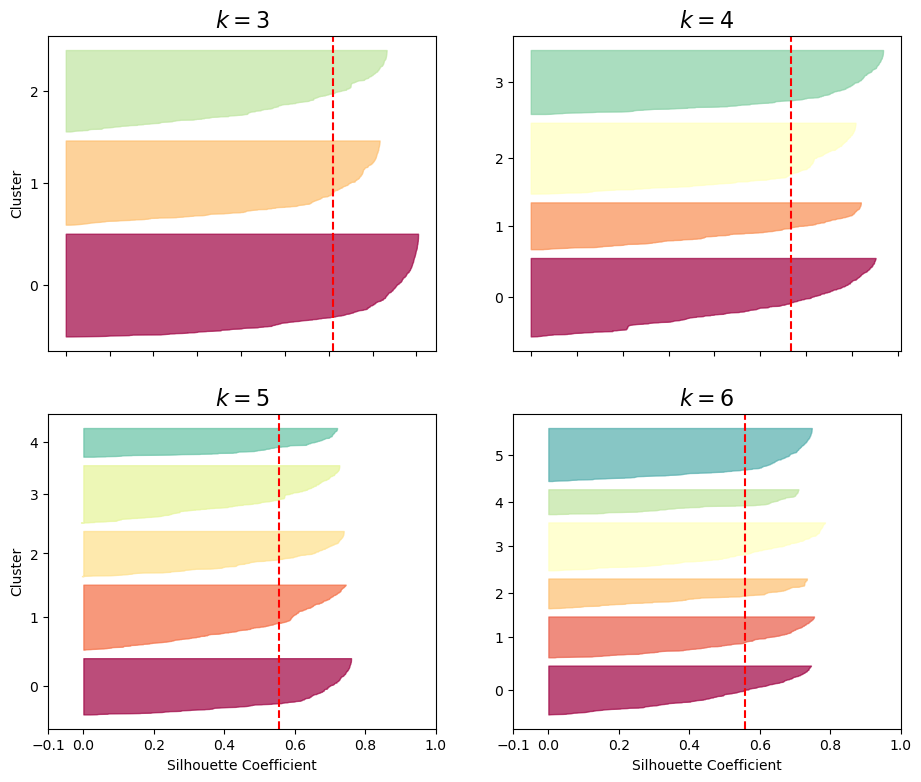

In [638]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


## Conclusión Clustering

Tendriamos varias opciones pero las más viables a mi parecer sería usar 2 o 3 Clusters por los gráficos con picos proporcionados anteriormente y los cuchillos de anterioridad 

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


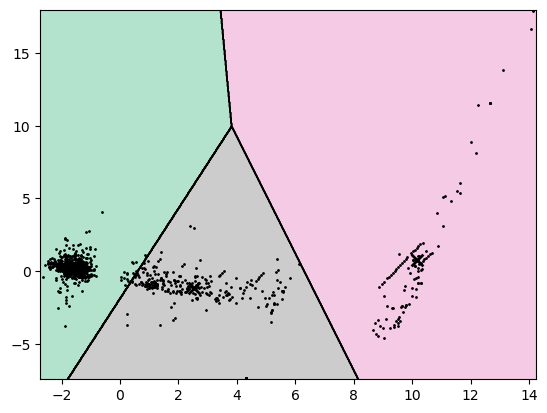

In [641]:
import numpy as np


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids,  circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution=1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),   np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)



kmeans = KMeans(n_clusters=3,random_state=42,init="k-means++")
data = kmeans.fit(X_reduced_pca[:,:2])
plot_decision_boundaries(kmeans,X_reduced_pca[:,:2])

# Manejo de datos Pre-Entreno

## División de datos

In [611]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## Pruebas SMOTE

*Relleno de datos de los train*

In [612]:
#!pip install imblearn
#!pip install -U threadpoolctl

In [613]:
#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 2) 
#X_train,y_train=sm.fit_resample(X_train, y_train.ravel()) 

# Predicción de Modelos

In [615]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = {
    "SGDClassifier":SGDClassifier('log_loss'),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    #'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

## Gráficos de modelos con Accuracy y Cross_Score

In [616]:

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    X_train_contiguous = np.ascontiguousarray(X_train)
    X_test_contiguous = np.ascontiguousarray(X_test)
    model.fit(X_train_contiguous, y_train)
    y_pred = model.predict(X_test_contiguous)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    training_score = cross_val_score(model, X_train, y_train, cv=5)
    print(f"\t{name} Cross_Score: {round(training_score.mean(),2)*100}","%")

SGDClassifier Accuracy: 0.67
	SGDClassifier Cross_Score: 60.0 %
Logistic Regression Accuracy: 0.95
	Logistic Regression Cross_Score: 95.0 %
Decision Tree Accuracy: 0.93


	Decision Tree Cross_Score: 93.0 %
Random Forest Accuracy: 0.96
	Random Forest Cross_Score: 96.0 %
SVM Accuracy: 0.67
	SVM Cross_Score: 67.0 %
Gradient Boosting Accuracy: 0.95
	Gradient Boosting Cross_Score: 95.0 %
XGBoost Accuracy: 0.96
	XGBoost Cross_Score: 95.0 %
AdaBoost Accuracy: 0.95
	AdaBoost Cross_Score: 95.0 %
Naive Bayes Accuracy: 0.91
	Naive Bayes Cross_Score: 91.0 %
MLP Neural Network Accuracy: 0.34
	MLP Neural Network Cross_Score: 66.0 %


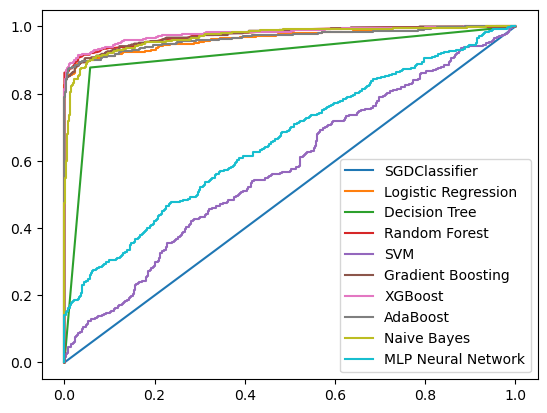

In [617]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import roc_curve


for name, model in models.items():
    y_probas = cross_val_predict(model, X_train, y_train, cv=3,
                                    method="predict_proba")
    y_scores_forest = y_probas[:, 1]
    fpr, tpr, thresholds_forest = roc_curve(y_train, y_scores_forest, pos_label=1,drop_intermediate=True)
    plt.plot(fpr, tpr, label=name)
    plt.legend()

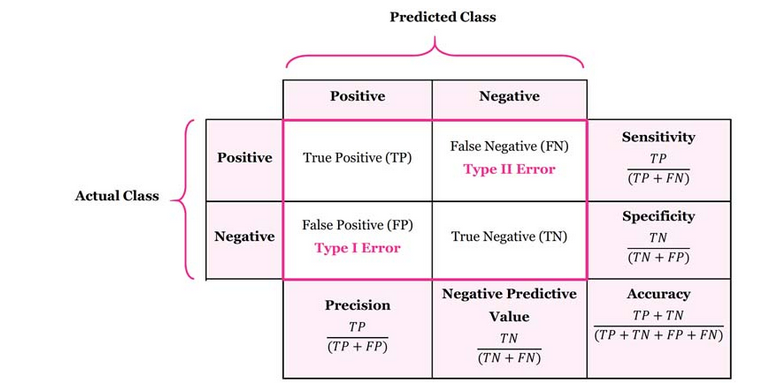

## Hiper-Parametrización del modelo seleccionado: 

### <i><b>XGBClassifier</b></i>

In [618]:
import optuna

import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb


def objective(trial):
    
    param = {
        'tree_method':'hist',  # this parameter means using the GPU when training our mode
        'max_depth': trial.suggest_int('max_depth', 1, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 50, 350),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'gamma': trial.suggest_float('gamma', 0.35, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 0.85),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
    }

    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=500)
#
#study.best_params




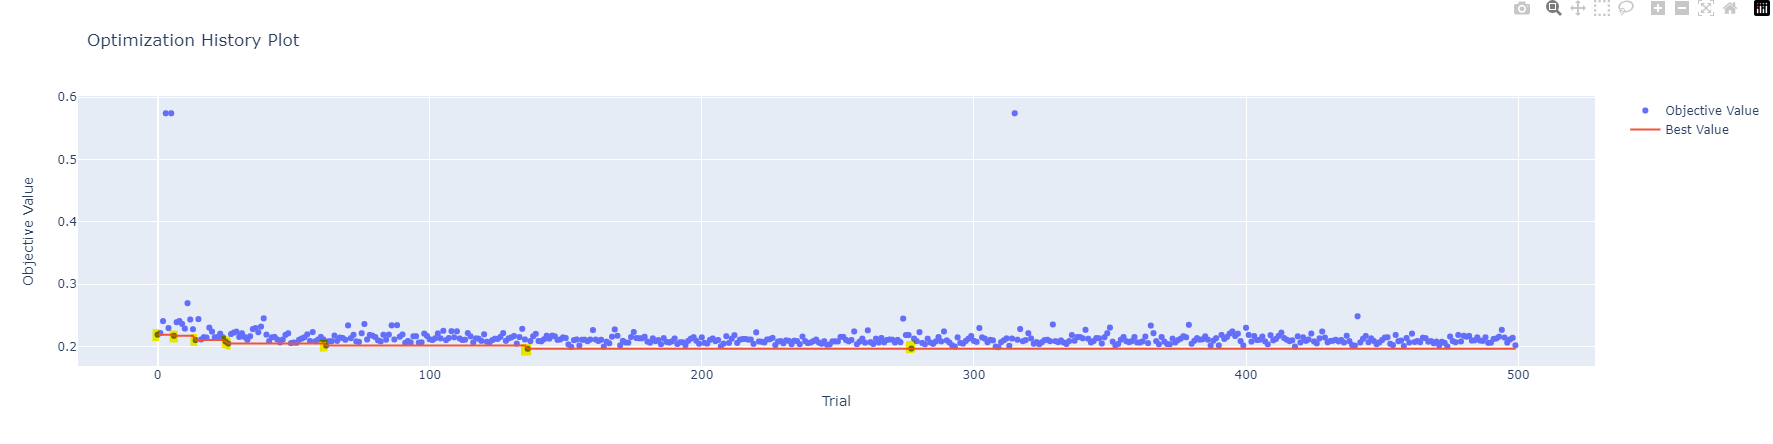

In [619]:
#optuna.visualization.plot_optimization_history(study)

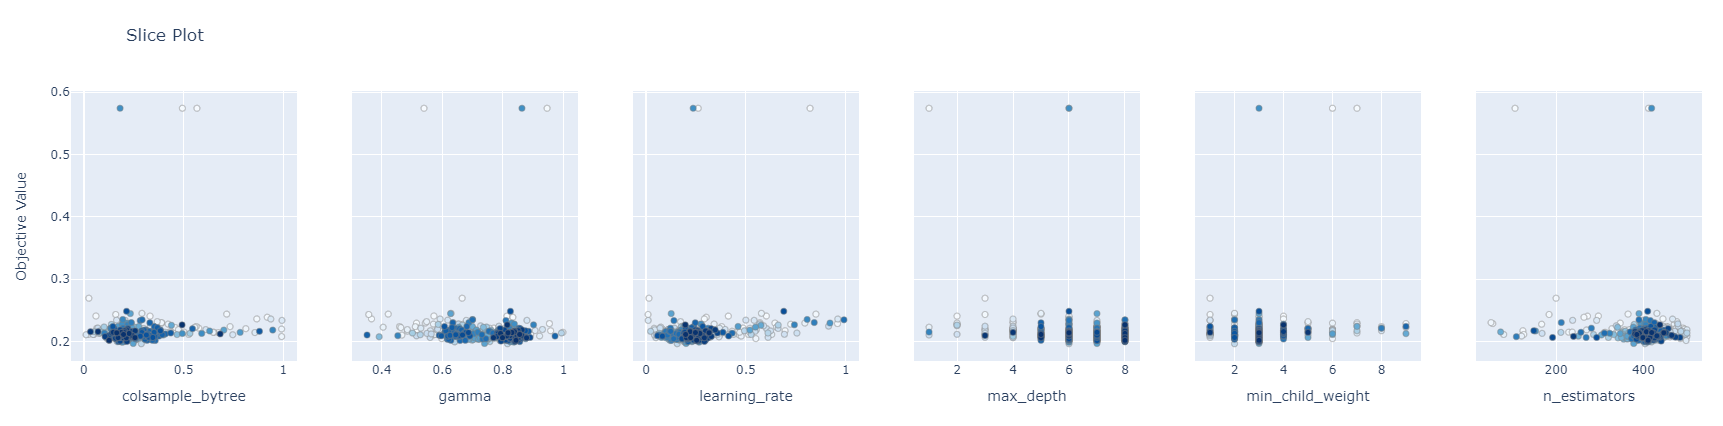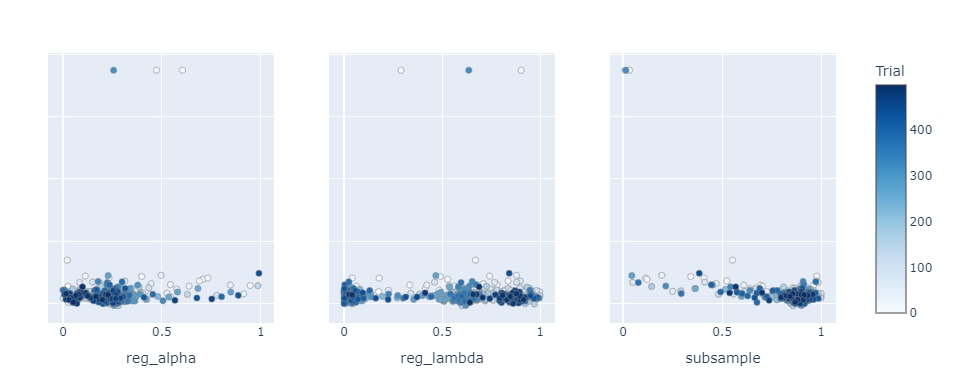

In [620]:
#optuna.visualization.plot_slice(study)

In [621]:
params = {'max_depth': 8,
 'learning_rate': 0.282727256138421,
 'n_estimators': 168,
 'min_child_weight': 5,
 'gamma': 0.9066109558463217,
 'subsample': 0.5865025789684437,
 'colsample_bytree': 0.7463794277983449,
 'reg_alpha': 0.5501565887096028,
 'reg_lambda': 0.2720110643925889}

#params = study.best_params

## Predicción de modelos

In [622]:
import xgboost


model = xgboost.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7463794277983449, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9066109558463217, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.282727256138421, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=168, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [623]:
from sklearn.metrics import precision_score, r2_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

datos_prueba =  X_test
y_pred = model.predict(datos_prueba)
y_reales = y_test
print("SCORE:",model.score(X_test,y_test))
print("R2 SCORE:",r2_score(y_test, y_pred))

model_score = cross_val_score(model, X_train, y_train,
                            scoring = "neg_mean_squared_error", cv=3)
root_lin_score = np.sqrt(-model_score)
predicciones=model.predict(X_test)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)

print("PRECISION SCORE",precision_score(y_test,y_pred))
print("RECALL SCORE",recall_score(y_test,y_pred))


SCORE: 0.9628378378378378
R2 SCORE: 0.8330513254371122
PRECISION SCORE 1.0
RECALL SCORE 0.8888888888888888


# Matriz de confusión

In [624]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_reales, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falso Positivos (FP): {fp}")
print(f"Falso Negativos (FN): {fn}")

#Verdaderos Positivos (TP): 86
#Verdaderos Negativos (TN): 197
#Falso Positivos (FP): 0
#Falso Negativos (FN): 13

Verdaderos Positivos (TP): 88
Verdaderos Negativos (TN): 197
Falso Positivos (FP): 0
Falso Negativos (FN): 11


<li><span style="Color:#90ee90">Verdaderos negativos</span> >> <b>Arriba a la izquierda</b> >> <i style="Color:#90ee90">No Fraude</i></li>
<li><span style="Color:red">Falsos negativos</span> >> <b>Arriba a la derecha</b> >> <i style="Color:#90ee90">No Fraude</i></li>
<li><span style="Color:red">Falsos positivos</span> >> <b>Abajo a la izquierda</b> >> <i style="Color:red">Fraude</i></li>
<li><span style="Color:#90ee90">Verdaderos positivos</span> >> <b>Abajo a la derecha</b> >> <i style="Color:red">Fraude</i></li>

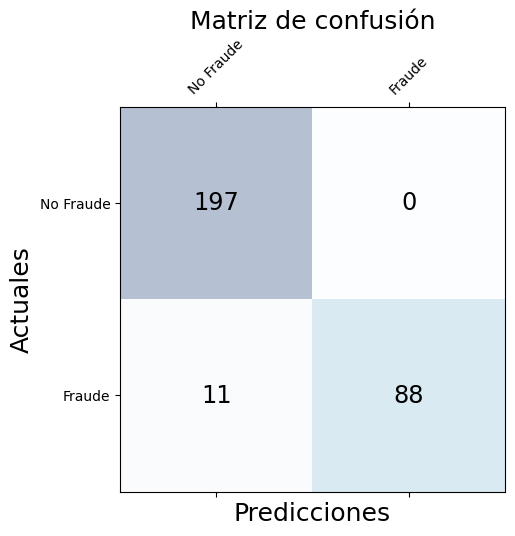

In [625]:
def draw_matrix(matrix):
    _, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(matrix, cmap='Blues', alpha=0.3)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicciones', fontsize=18)
    plt.ylabel('Actuales', fontsize=18)
    plt.title('Matriz de confusión', fontsize=18)
    lista = ['No Fraude','Fraude']
    tick_marks = np.arange(len(lista))
    plt.xticks(tick_marks, lista, rotation=45)
    plt.yticks(tick_marks, lista)
    plt.show()

draw_matrix(conf_matrix)